# Aim:

# Do markets perform significantly better/worse during some months?

# Do markets perform poorly in Dec (as traders are on holiday) so does it makes sense to buy in Dec and sell in Jan?

In [1]:
import pandas as pd
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from time import process_time
import scipy.stats

In [2]:
data=pd.read_excel(r'C:\Users\Vedant Wanchoo\Desktop\Recent Research\Day and Month Effect\Month_Effect.xlsx',sheet_name='Sheet3')

In [3]:
data['Ret']=data['NIFTY 500 - PRICE INDEX'].pct_change()
data=data.dropna()

In [4]:
data.head()

,Date,NIFTY 500 - PRICE INDEX,Ret
1,1991-02-02,359.21,0.016527
2,1991-03-02,432.50,0.204031
3,1991-04-02,425.48,-0.016231
4,1991-05-02,431.84,0.014948
5,1991-06-02,440.35,0.019706


In [5]:
data.shape

(349, 3)

In [6]:
#This Cell takes 20-40 seconds to run

start_time = process_time()

data['Month']=0

for j in range(0,349):
    data['Month'].iloc[j]=data['Date'].iloc[j].strftime('%m')
    
print ((process_time()-start_time), "seconds")

C:\Users\Vedant Wanchoo\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


12.734375 seconds


In [7]:
data.head()

,Date,NIFTY 500 - PRICE INDEX,Ret,Month
1,1991-02-02,359.21,0.016527,02
2,1991-03-02,432.50,0.204031,03
3,1991-04-02,425.48,-0.016231,04
4,1991-05-02,431.84,0.014948,05
5,1991-06-02,440.35,0.019706,06


In [8]:
Pivot=data.pivot_table(index='Date',columns='Month', values='Ret')
Pivot.head()

Month,01,02,03,04,05,06,07,08,09,10,11,12
Date,,,,,,,,,,,,
1991-02-02,NaN,0.016527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-02,NaN,NaN,0.204031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-02,NaN,NaN,NaN,-0.016231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-02,NaN,NaN,NaN,NaN,0.014948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-02,NaN,NaN,NaN,NaN,NaN,0.019706,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
Pivot.describe()

Month,01,02,03,04,05,06,07,08,09,10,11,12
count,29.000000,30.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.042292,-0.002704,0.031752,0.009051,-0.002255,0.010480,0.008993,0.012977,0.025780,0.003258,-0.001568,0.018460
std,0.071866,0.081273,0.093557,0.116403,0.076050,0.112360,0.066688,0.081755,0.069331,0.074107,0.075248,0.082173
min,-0.090760,-0.181645,-0.107130,-0.186480,-0.227556,-0.257521,-0.163109,-0.178530,-0.091647,-0.147280,-0.240625,-0.133106
25%,0.001265,-0.043396,-0.033043,-0.046128,-0.022106,-0.034824,-0.017668,-0.028549,-0.017762,-0.041195,-0.029033,-0.028582
50%,0.018575,-0.003014,0.016715,-0.001775,-0.000909,0.007378,0.008812,0.031708,0.021409,0.016146,0.000000,0.009687
75%,0.083215,0.043933,0.087923,0.056538,0.041308,0.058018,0.049905,0.052673,0.057309,0.056553,0.050626,0.064537
max,0.223616,0.161795,0.324521,0.435433,0.123091,0.367468,0.119622,0.250087,0.199108,0.131211,0.135141,0.255643


In [10]:
Pivot=Pivot.reset_index()

In [11]:
Pivot.head()

Month,Date,01,02,03,04,05,06,07,08,09,10,11,12
0,1991-02-02,NaN,0.016527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-03-02,NaN,NaN,0.204031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991-04-02,NaN,NaN,NaN,-0.016231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991-05-02,NaN,NaN,NaN,NaN,0.014948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991-06-02,NaN,NaN,NaN,NaN,NaN,0.019706,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
Jan=Pivot.iloc[:,1:2]
Jan=Jan.dropna()
Jan=Jan.reset_index()
Jan=Jan.iloc[:,1:2]

Feb=Pivot.iloc[:,2:3]
Feb=Feb.dropna()
Feb=Feb.reset_index()
Feb=Feb.iloc[:,1:2]

Mar=Pivot.iloc[:,3:4]
Mar=Mar.dropna()
Mar=Mar.reset_index()
Mar=Mar.iloc[:,1:2]

Apr=Pivot.iloc[:,4:5]
Apr=Apr.dropna()
Apr=Apr.reset_index()
Apr=Apr.iloc[:,1:2]

May=Pivot.iloc[:,5:6]
May=May.dropna()
May=May.reset_index()
May=May.iloc[:,1:2]

Jun=Pivot.iloc[:,6:7]
Jun=Jun.dropna()
Jun=Jun.reset_index()
Jun=Jun.iloc[:,1:2]

Jul=Pivot.iloc[:,7:8]
Jul=Jul.dropna()
Jul=Jul.reset_index()
Jul=Jul.iloc[:,1:2]

Aug=Pivot.iloc[:,8:9]
Aug=Aug.dropna()
Aug=Aug.reset_index()
Aug=Aug.iloc[:,1:2]

Sep=Pivot.iloc[:,9:10]
Sep=Sep.dropna()
Sep=Sep.reset_index()
Sep=Sep.iloc[:,1:2]

Oct=Pivot.iloc[:,10:11]
Oct=Oct.dropna()
Oct=Oct.reset_index()
Oct=Oct.iloc[:,1:2]

Nov=Pivot.iloc[:,11:12]
Nov=Nov.dropna()
Nov=Nov.reset_index()
Nov=Nov.iloc[:,1:2]

Dec=Pivot.iloc[:,12:13]
Dec=Dec.dropna()
Dec=Dec.reset_index()
Dec=Dec.iloc[:,1:2]

In [13]:
Jan.head()

Month,01
0,0.013099
1,0.006946
2,0.100270
3,-0.052359
4,0.000357


In [16]:
Alldata = pd.concat([Jan['01'],Feb['02'],Mar['03'],Apr['04'],May['05'],Jun['06'],Jul['07'],Aug['08'],Sep['09'],Oct['10'],Nov['11'],Dec['12']],axis=1)

Alldata=Alldata.dropna()

In [17]:
Alldata.describe()

,01,02,03,04,05,06,07,08,09,10,11,12
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.042292,-0.001659,0.031752,0.009051,-0.002255,0.010480,0.008993,0.012977,0.025780,0.003258,-0.001568,0.018460
std,0.071866,0.082506,0.093557,0.116403,0.076050,0.112360,0.066688,0.081755,0.069331,0.074107,0.075248,0.082173
min,-0.090760,-0.181645,-0.107130,-0.186480,-0.227556,-0.257521,-0.163109,-0.178530,-0.091647,-0.147280,-0.240625,-0.133106
25%,0.001265,-0.044085,-0.033043,-0.046128,-0.022106,-0.034824,-0.017668,-0.028549,-0.017762,-0.041195,-0.029033,-0.028582
50%,0.018575,-0.000855,0.016715,-0.001775,-0.000909,0.007378,0.008812,0.031708,0.021409,0.016146,0.000000,0.009687
75%,0.083215,0.044630,0.087923,0.056538,0.041308,0.058018,0.049905,0.052673,0.057309,0.056553,0.050626,0.064537
max,0.223616,0.161795,0.324521,0.435433,0.123091,0.367468,0.119622,0.250087,0.199108,0.131211,0.135141,0.255643


In [20]:
Alldata.tail()

,01,02,03,04,05,06,07,08,09,10,11,12
24,0.008038,0.044630,0.017671,-0.032803,-0.043986,0.007378,0.027046,0.020857,-0.091647,0.027619,0.012984,-0.006097
25,0.007946,-0.074249,-0.018402,0.050243,0.020891,0.040888,0.026083,0.040275,0.026495,0.003684,-0.018700,-0.060083
26,0.039452,0.077772,0.019153,0.046999,0.022128,0.021284,0.001172,0.044015,-0.003596,-0.017732,0.074157,-0.019198
27,-0.002575,-0.000855,-0.019602,-0.021869,0.046644,-0.020038,-0.015802,0.052673,0.034712,-0.076212,-0.029033,0.025564
28,0.018575,-0.005174,-0.002076,0.075607,-0.008569,0.029582,-0.017914,-0.082187,0.003757,0.028833,0.050626,0.009687


In [17]:
#In the formula below, I have selected every combination of months and tried to find out if there is a statistically significant difference (two sample t test)

In [21]:
for i in range(0,11):
    for j in range (i+1,12):
        #print(scipy.stats.ks_2samp(Alldata.iloc[:,i],Alldata.iloc[:,j]))
        print(pd.DataFrame(scipy.stats.ks_2samp(Alldata.iloc[:,i],Alldata.iloc[:,j])).iloc[1] < 0.05)

0    True
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    True
Name: 1, dtype: bool
0    True
Name: 1, dtype: bool
0    True
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    True
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Name: 1, dtype: bool
0    False
Na

# The returns of the following months are significantly different from each other:(Out of 66 possible permutations)
    
Jan-Feb, Jan-Apr, Jan-May, Jan-Jun, Jan-Nov



# While the December-Jan effect is highly popular, the difference of returns during these two months is not statistically significant. Additioanlly, it is not that December is a bad month for the markets, its just that Jan is the best month for the markets so buying in Dec and selling in Jan can be somewhat profitable.  

<BarContainer object of 12 artists>

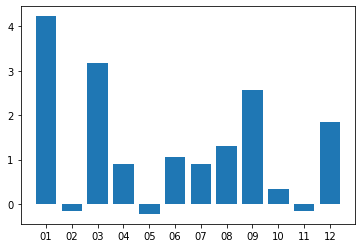

In [68]:
plt.bar(Alldata.columns,Alldata.mean()*100)